In [1]:
# library for working with data frames
import pandas as pd

# library for creating plots
import matplotlib.pyplot as plt

# library for creating and customizing plots
import seaborn as sns

Followers vs Streams

In [2]:
# Select the 'Artist Followers' and 'Streams' columns from the dataset
usecols = ['Artist Followers','Streams']

# Read the csv file and only select the specified columns
df = pd.read_csv("spotify_dataset.csv", usecols = usecols)

# Remove rows with missing values
df.dropna(inplace = True)

# Remove rows where the 'Streams' column is an empty string
df = df.loc[df['Streams'] != ' ']

# Remove rows where the 'Artist Followers' column is an empty string
df = df.loc[df['Artist Followers'] != ' ']

# Replace commas in the 'Streams' column with empty strings
df['Streams'] = df['Streams'].replace(',','', regex=True)

# Replace commas in the 'Artist Followers' column with empty strings
df['Artist Followers'] = df['Artist Followers'].replace(',','', regex=True)

# Convert the 'Streams' column to an integer data type
df['Streams'] = df['Streams'].astype('int64')

# Rename the 'Artist Followers' column to 'Followers'
df['Followers'] = df['Artist Followers'].astype('int64')

# Remove the 'Artist Followers' column and reset the index
df = df.drop(['Artist Followers'], axis=1).reset_index(drop=True)

In [3]:
# Calculate the mean number of followers
average_followers = df['Followers'].mean()

# Create a dataframe for artists with more followers than the average
high_followers = df[df.Followers >= average_followers]

# Create a dataframe for artists with fewer followers than the average
low_followers = df[df.Followers < average_followers]

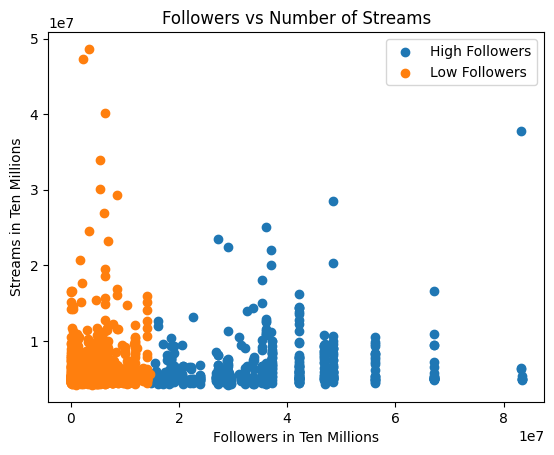

<Figure size 1000x1000 with 0 Axes>

In [4]:
# Create a scatter plot comparing the number of followers to the number of streams for artists with high followers
plt.scatter(high_followers.Followers, high_followers['Streams'], label = "High Followers")

# Create a scatter plot comparing the number of followers to the number of streams for artists with low followers
plt.scatter(low_followers.Followers, low_followers['Streams'], label = "Low Followers")

# Add a title to the plot
plt.title("Followers vs Number of Streams")

# Add a label for the x-axis
plt.xlabel("Followers in Ten Millions")

# Add a label for the y-axis
plt.ylabel("Streams in Ten Millions")

# Add a legend to the plot
plt.legend()

# Save the plot as an image file
plt.savefig(fname="followers_vs_streams.png")

# Set the size of the plot to 10x10
plt.figure(figsize = (10,10))

# Display the plot
plt.show()

In [5]:
# Print the correlation for low followers
print('\033[1m' + "High Popularity Correlation:" + '\033[0m', '\n', high_followers[["Followers", "Streams"]].corr())

# Print the correlation for low followers
print('\033[1m' + "Low Popularity Correlation:" + '\033[0m', '\n', low_followers[["Followers", "Streams"]].corr())

High Popularity Correlation: 
            Followers   Streams
Followers   1.000000  0.206191
Streams     0.206191  1.000000
Low Popularity Correlation: 
            Followers   Streams
Followers   1.000000  0.055168
Streams     0.055168  1.000000


Genre Analysis

In [6]:
# Specify the columns to read from the CSV file
usecols = ['genre', 'popularity', 'duration_ms']

# Read the CSV file into a Pandas DataFrame and store it in df_genre
df_genre = pd.read_csv('SpotifyFeatures.csv', usecols=usecols)

# Remove rows with missing values
df_genre.dropna(inplace = True)

# Display the DataFrame
df_genre

,genre,popularity,duration_ms
0,Movie,0,99373
1,Movie,1,137373
2,Movie,3,170267
3,Movie,0,152427
4,Movie,4,82625
...,...,...,...
232720,Soul,39,326240
232721,Soul,38,282447
232722,Soul,47,166960
232723,Soul,44,222442


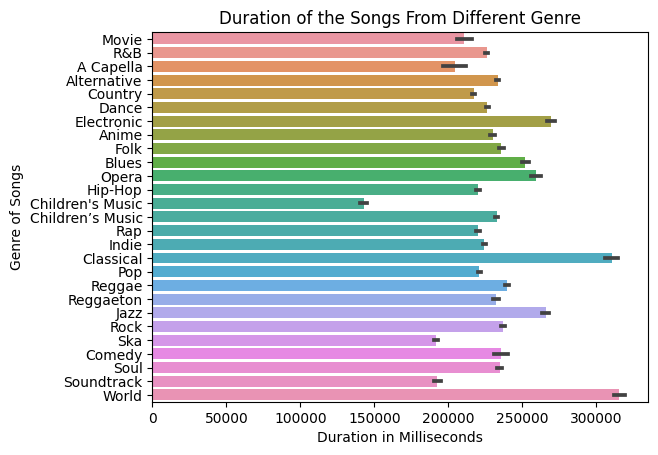

In [7]:
# Create a bar plot showing the duration of songs in each genre
# Set the title of the plot
plt.title('Duration of the Songs From Different Genre')

# Set the color palette for the plot
sns.color_palette('flare', as_cmap=True)

# Create the bar plot using seaborn's barplot function
# The y-axis shows the genre of the songs
# The x-axis shows the duration of the songs in milliseconds
sns.barplot(y='genre', x='duration_ms', data=df_genre)

# Add a label for the x-axis
plt.xlabel('Duration in Milliseconds')

# Add a label for the y-axis
plt.ylabel("Genre of Songs")

# Save the plot as an image file
plt.savefig(fname="duration_genres.png")

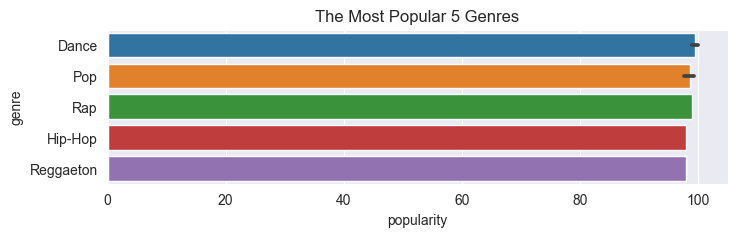

Most Common Words

In [9]:
# Specify the columns to read from the CSV file
usecols = ['track_name']

# Read the CSV file into a Pandas DataFrame and store it in df
df = pd.read_csv('SpotifyFeatures.csv', usecols=usecols)

# Remove rows with missing values
df.dropna(inplace = True)

# Convert the track names to lowercase and remove punctuation
df["track_name"] = df['track_name'].str.lower().str.replace('[^\w\s]','', regex=True)

# Split the track names into individual words and count the frequency of each word
df_words = df.track_name.str.split(expand=True).stack().value_counts().reset_index()
df_words.columns = ['word', 'frequency']

# Remove meaningless words from the data frame
df_words = df_words[df_words.word != 'the']
df_words = df_words[df_words.word != 'in']
df_words = df_words[df_words.word != 'a']
df_words = df_words[df_words.word != 'i']
df_words = df_words[df_words.word != 'of']
df_words = df_words[df_words.word != 'to']
df_words = df_words[df_words.word != 'on']
df_words = df_words[df_words.word != 'it']
df_words = df_words[df_words.word != 'and']
df_words = df_words[df_words.word != 'feat']

# Select the top 5 most frequent words
words_top5 = df_words.sort_values('frequency', ascending = False).head(5)

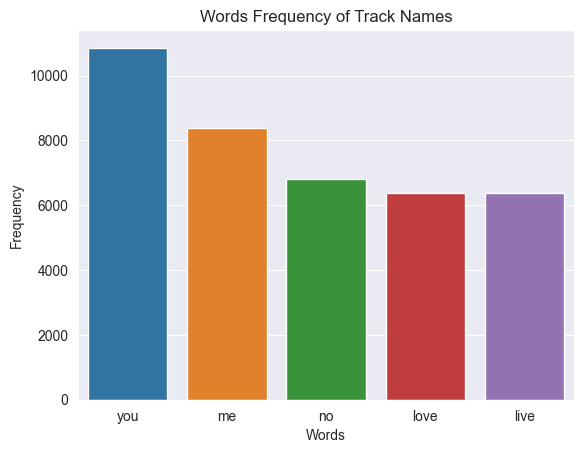

In [10]:
# Create a bar plot showing the frequency of each word in the track names
plt.title('Words Frequency of Track Names')

# Set the color palette for the plot
sns.color_palette('flare', as_cmap=True)

# Create the bar plot using seaborn's barplot function
# The y-axis shows the frequency of the words
# The x-axis shows the words
sns.barplot(y='frequency', x='word', data=words_top5)

# Add a label for the x-axis
plt.xlabel('Words')

# Add a label for the y-axis
plt.ylabel("Frequency")

# Save the plot as an image file
plt.savefig(fname="words_frequency_of_track_names.png")

Streams by Region

In [11]:
# Specify the columns to read from the CSV file
usecols = ['rank','region','chart','streams']

# Read the CSV file into a Pandas DataFrame and store it in df_charts
df_charts = pd.read_csv('charts.csv', usecols=usecols)

# Remove rows with missing values
df_charts.dropna(inplace = True)

# Select rows from the DataFrame where the chart column has a value of "top200" and the rank column has a value of 200 or lower
top200 = df_charts[(df_charts['chart'] == 'top200') & (df_charts['rank'] <= 200)]

# Drop the chart column from the DataFrame
top200 = top200.drop(['chart'], axis=1).reset_index(drop=True)

# Drop the rank column from the DataFrame
top200 = top200.drop(['rank'], axis=1).reset_index(drop=True)

In [12]:
# Group top200 dataframe by region and sum the streams for each region
streams = top200.groupby('region')['streams'].sum().reset_index()

# Calculate the percentage of streams for each region
streams['percent_streams'] = streams['streams']/streams['streams'].sum()

# If the percentage of streams for a region is less than 1%, label it as 'Other'
streams['region'] = streams.apply(lambda x: x['region'] if x['percent_streams'] >= .01 else 'Other', axis=1)

# Group the data by the modified region and sum the percentage of streams
streams = streams.groupby('region')['percent_streams'].sum().reset_index().round(3)

# Sort the data by the percentage of streams
streams = streams.sort_values(by='percent_streams')


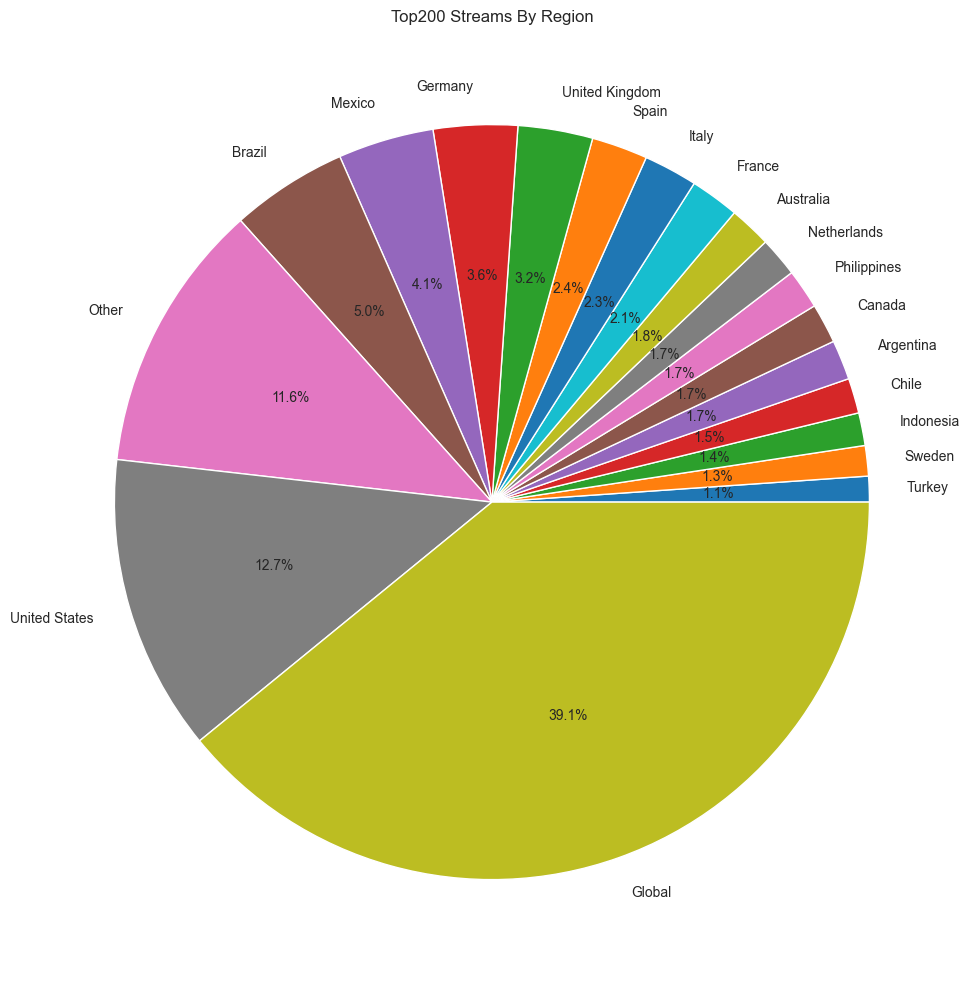

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))

# Use the axis object's to create a pie chart with the percent_streams column as the data and the region column as the labels
ax.pie(x=streams['percent_streams'], labels=streams['region'], autopct='%.1f%%')

# Set the title of the plot
ax.set_title('Top200 Streams By Region')

# Adjust the layout of the plot
plt.tight_layout()

# Save the plot as an image file
plt.savefig(fname="streams_by_region.png")

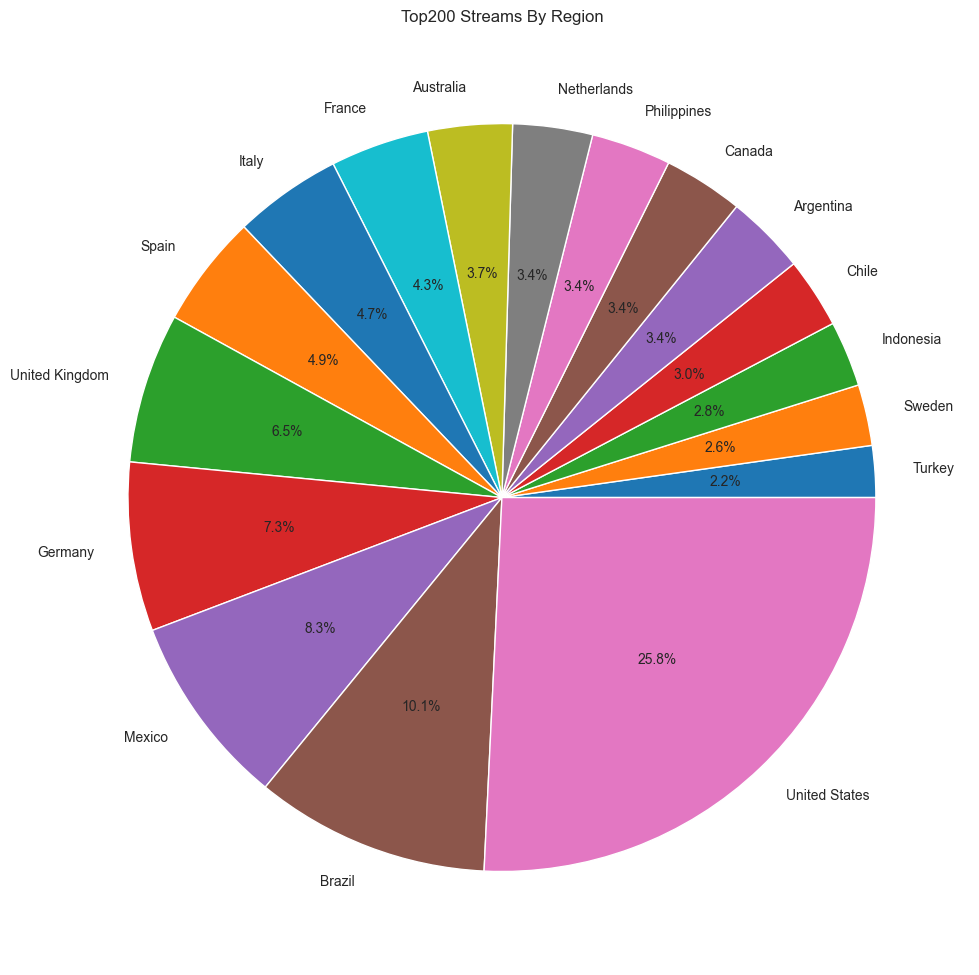

In [14]:
# Without Global and Other values

# Select all rows from the streams DataFrame where the region column does not have a value of "Global"
streams = streams.loc[~(streams['region'] == 'Global')].reset_index(drop=True)

# Select all rows from the streams DataFrame where the region column does not have a value of "Other"
streams = streams.loc[~(streams['region'] == 'Other')].reset_index(drop=True)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 10))

# Use the axis object's to create a pie chart with the percent_streams column as the data and the region column as the labels 
ax.pie(x=streams['percent_streams'], labels=streams['region'], autopct='%.1f%%')

# Set the title of the plot
ax.set_title('Top200 Streams By Region')

# Adjust the layout of the plot
plt.tight_layout()

# Save the plot as an image file
plt.savefig(fname="streams_by_region_without_global_and_other.png")